In [1]:
# 지니 지수(Gini Index) 계산 식
from google.colab import files
uploaded = files.upload() # 파일 업로드 기능 실행

for fn in uploaded.keys(): # 업로드된 파일 정보 출력
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

Saving 지니계수.png to 지니계수 (1).png
User uploaded file "지니계수.png" with length 35211 bytes


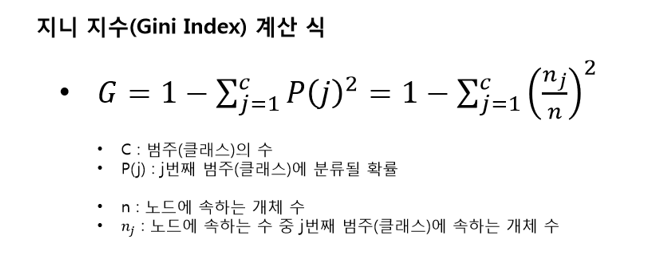

In [2]:
from IPython.display import Image
Image('지니계수.png')

In [3]:
from sklearn import datasets   
from sklearn.tree import DecisionTreeClassifier

In [4]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

In [5]:
datasets.load_breast_cancer()

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [6]:
cancer = datasets.load_breast_cancer()

In [7]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [8]:
cancer.data[0]

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [9]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [10]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [11]:
X = cancer.data
y = cancer.target

In [12]:
clf = DecisionTreeClassifier() # 예측 모델 생성

In [13]:
clf.fit(X, y) # X, y에 따른 모델 적용

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
len(cancer.feature_names)

30

In [15]:
import random
r_list = []
for i in range(30):
  r_list.append(random.random())
new_patient = [r_list]

In [16]:
new_patient

[[0.8860296611291643,
  0.23437392050482642,
  0.667422817470433,
  0.7121295604657663,
  0.45383685730490764,
  0.318509735266694,
  0.8814375487829313,
  0.032119089014591706,
  0.06983356907765392,
  0.6504272808741062,
  0.892484692136337,
  0.4667685030224722,
  0.9703964249804896,
  0.5682762336211993,
  0.9827434222479032,
  0.17971509486203696,
  0.9324898330417357,
  0.09994245448806771,
  0.6227062214609473,
  0.1270313663627437,
  0.3148389196149667,
  0.028337644681571073,
  0.9824186914453807,
  0.5654973939412709,
  0.8671757457457022,
  0.5475090165230844,
  0.6199944239837643,
  0.8101415394936817,
  0.5697878407187134,
  0.019171818990593614]]

In [17]:
clf.predict(new_patient)

array([0])

In [18]:
from IPython.display import Image
from sklearn import tree
import pydotplus

In [19]:
# tree.export_graphviz를 통해서 tree를 시각화
dot_data = tree.export_graphviz(
    clf, # 트리모형 만듦
    feature_names = cancer.feature_names, # columns
    class_names =  cancer.target_names # 결과값
)

In [20]:
pydotplus.graph_from_dot_data(dot_data).create_png()

b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\n\xd0\x00\x00\x04\xbc\x08\x02\x00\x00\x00\x90\x10\xcb\x95\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xddi\\\x94\xf5\xfe\xff\xf1\xef\xa8\x0c3l\x03(\x08*(\xb8\xb3\x18\xa2&"&\xd8\xe9h\xa5\xa8\xc9Vz\\\xd2\x12\xc9\xe3\x1eP\x12b)\x81z\xc4\xff9B&\x99\xa72\x91H\xc5\xccJ3sKA(70\x94\xf4\xb0\xe8(*\xa88,2\xc0\xfco\xcc\xe3\xc7\xe1\xb0\x18(8\x8a\xaf\xe7-\xaf\xef\xf2\xb9\xde\xd7x\x87\x07\xf3\xe1{I4\x1a\x8d\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00h\x8ev\xba\x0e\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x9e<4\x1c\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x80f\xa3\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x004[\x07]\x07\x00\x00\x00\x00\x00\x00\x00\xd0v\\\xbe|\xf9\xd8\xb1c\xbaN\x81\xb6\xcc\xc6\xc6f\xd8\xb0a\xbaN\x01\x00\x00\x00!h8\x00\x00\x00\x00\x00\x00\x00\xd0\x82\x8e\x1d;\xe6\xef\xef\xaf\xeb\x14h\xcb|||\x92\x92\x92t\x9d\x02\x00\x00\x00B\xd0p\x00\x00\x00\x00\x00\x00\x00\xa0\xc5i4\x1a]G@\xdb\xe4

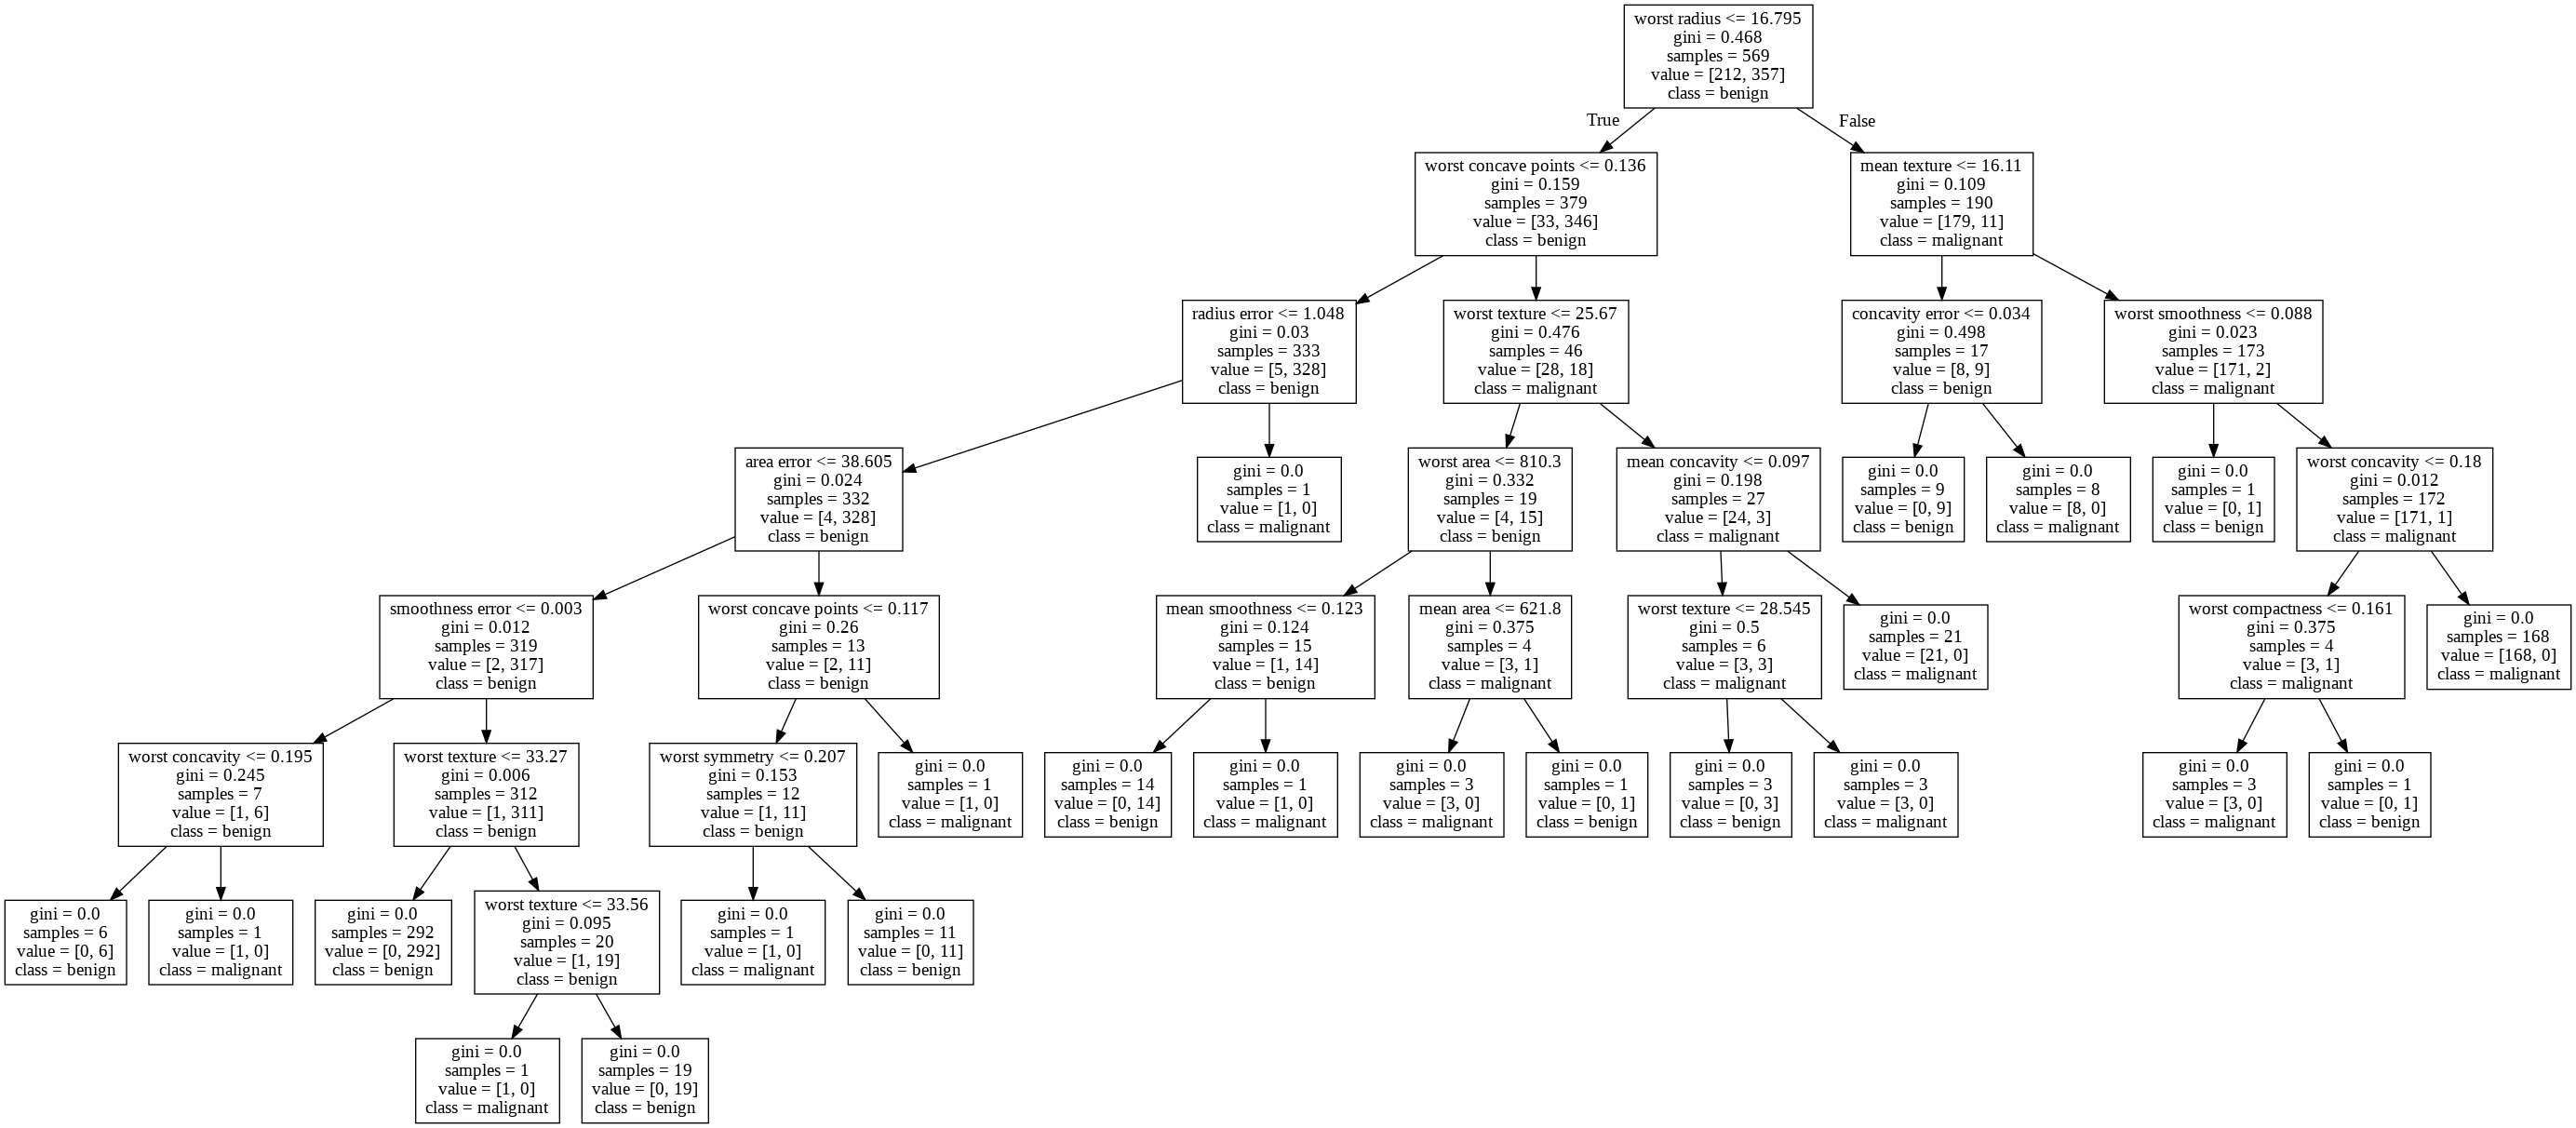

In [21]:
Image(pydotplus.graph_from_dot_data(dot_data).create_png())

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [23]:
clf.fit(X_train, y_train)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred = clf.predict(X_test)

In [25]:
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0])

In [26]:
y_test

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0])

In [38]:
((y_test - y_pred) * (y_test - y_pred)).sum() / len(y_test) # MSE

0.11403508771929824

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error

In [28]:
print('Confustion Matrix')
confusion_matrix(y_test, y_pred)

Confustion Matrix


array([[37,  4],
       [ 9, 64]])

In [29]:
print('Accueracy')
accuracy_score(y_test, y_pred, normalize = True) # normailze = False를 할 경우 절대적으로 맞은 개수가 몇 개인지 알려줌

Accueracy


0.8859649122807017

In [30]:
print('Classificaion Reort')
print(classification_report(y_test, y_pred))

Classificaion Reort
              precision    recall  f1-score   support

           0       0.80      0.90      0.85        41
           1       0.94      0.88      0.91        73

    accuracy                           0.89       114
   macro avg       0.87      0.89      0.88       114
weighted avg       0.89      0.89      0.89       114



In [31]:
print('Mean Squared Error')
mean_squared_error(y_test, y_pred)

Mean Squared Error


0.11403508771929824

In [32]:
mean_squared_error(y_test, y_pred) + accuracy_score(y_test, y_pred, normalize = True)

1.0

In [33]:
dot_data = tree.export_graphviz(
    clf,
    feature_names = cancer.feature_names,
    class_names = cancer.target_names
)

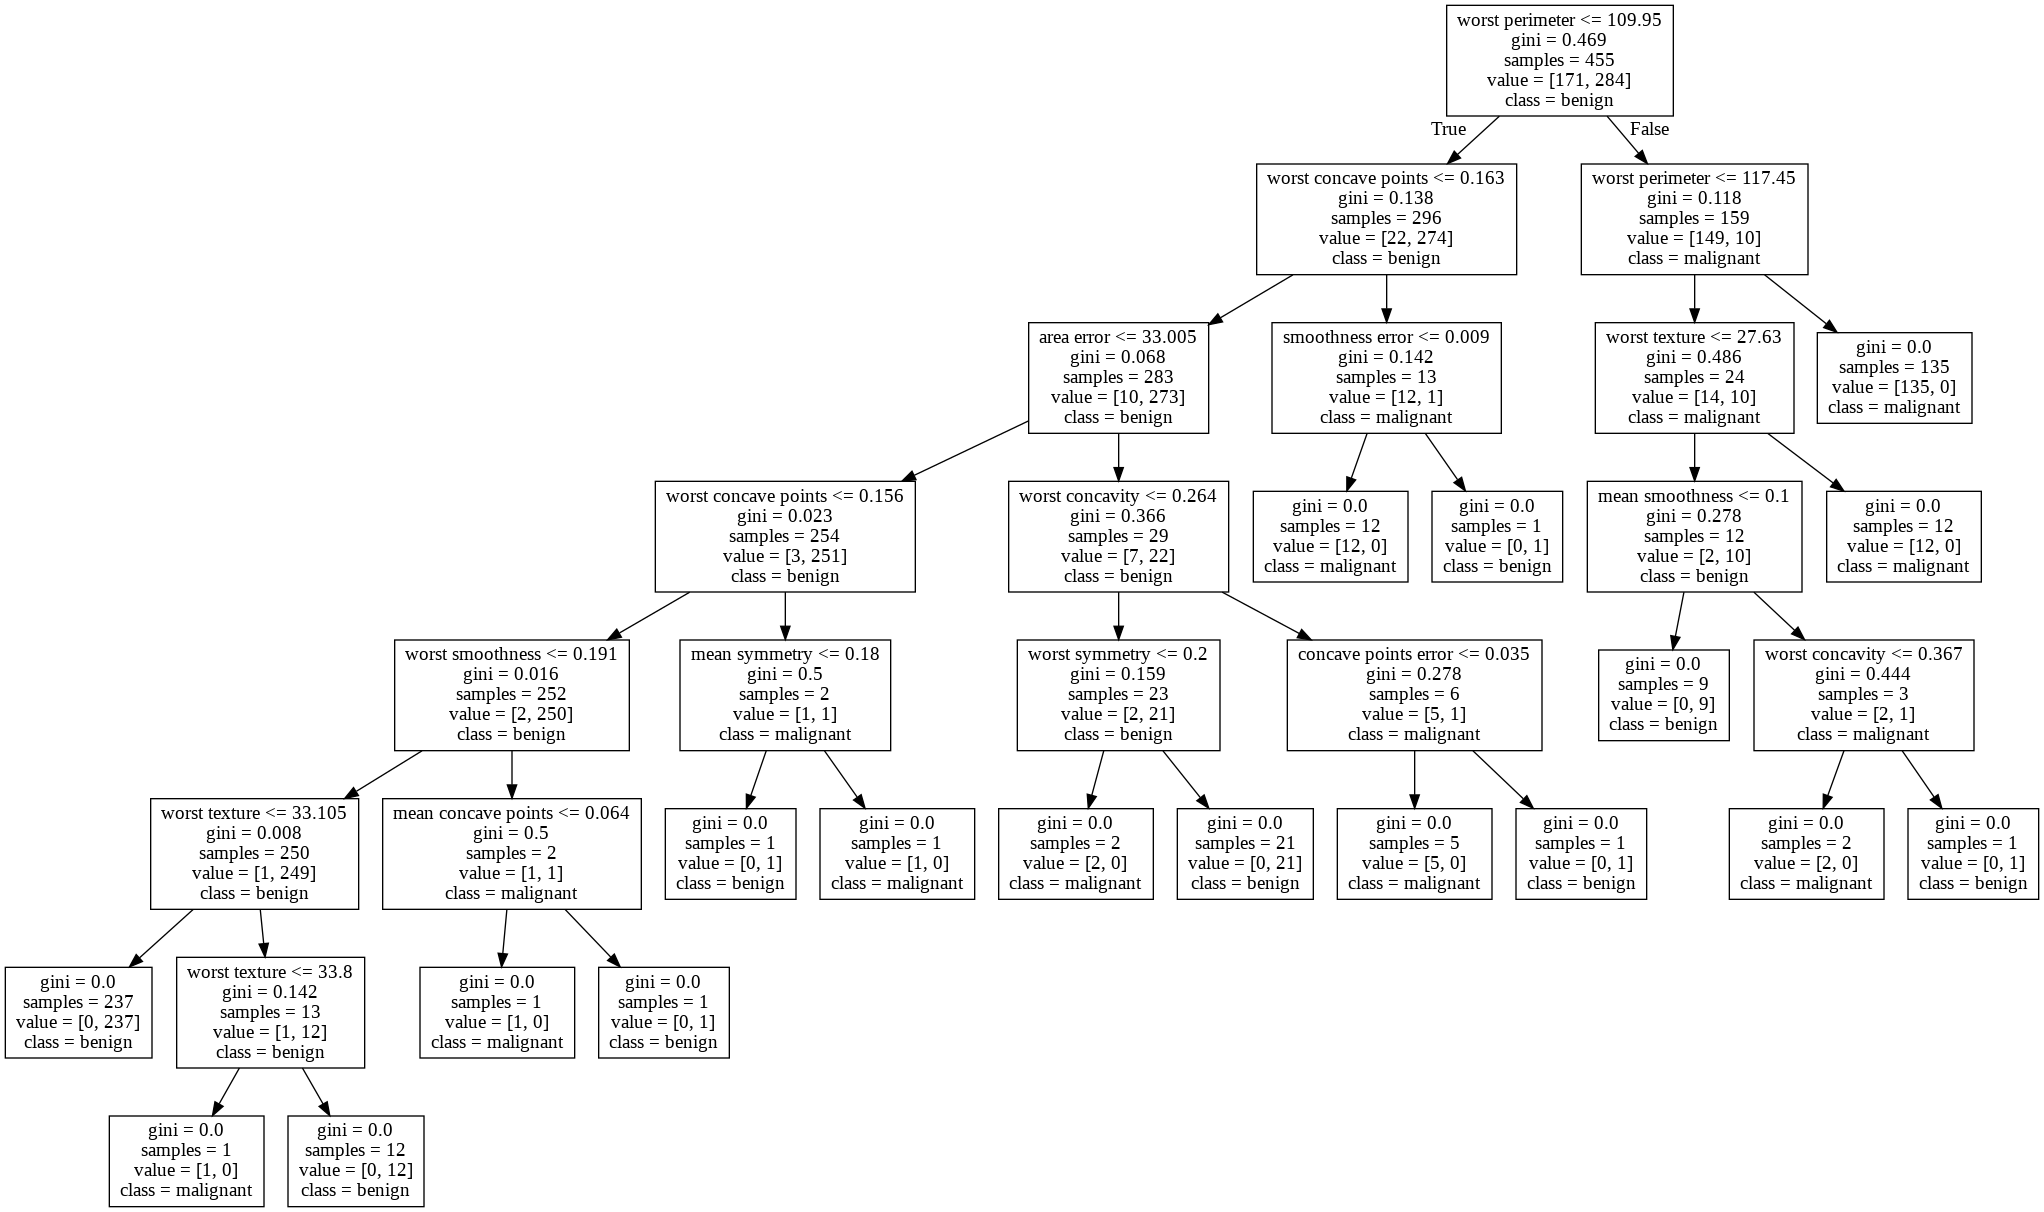

In [34]:
Image(pydotplus.graph_from_dot_data(dot_data).create_png())

In [39]:
StratifiedKFold(n_splits = 10)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [57]:
skf = StratifiedKFold(n_splits = 10, shuffle=True) # shuffle은 데이터를 섞은 후 데이터 셋을 구성
skf.get_n_splits(X, y) # skf가 몇 번 반복할지 찍어주는 함수

10

In [58]:
for train_index, test_index in skf.split(X,y):
  # print('Train set :', train_index)
  print('Test set :', test_index)
  print('*'*100)

Test set : [ 16  32  54  62  92  99 101 103 108 124 135 139 141 154 156 157 173 185
 188 192 194 213 240 255 256 258 276 285 286 289 308 315 318 324 335 337
 339 340 359 380 398 401 417 432 434 464 504 506 521 527 529 533 537 543
 548 551 567]
****************************************************************************************************
Test set : [  1  17  29  40  42  65  66  68  75  78  82  89  90 105 107 117 130 164
 178 195 212 231 237 239 242 300 303 304 307 325 344 362 368 369 372 403
 404 406 425 427 439 444 454 458 461 470 476 478 486 488 511 512 520 525
 540 542 552]
****************************************************************************************************
Test set : [ 26  48  55  56  59  61  71  77  93  94 128 143 146 148 150 161 163 165
 179 181 186 191 193 208 218 245 250 260 262 264 269 274 280 288 292 299
 321 330 343 347 348 351 357 373 394 397 405 419 424 428 463 483 490 493
 497 505 507]
******************************************************************

In [59]:
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X, y, cv = skf)
print('K Fold Cross Validation Score')
print(score)
print('Average Accuracy')
print(score.mean())

K Fold Cross Validation Score
[0.87719298 0.96491228 0.89473684 0.94736842 0.94736842 0.92982456
 0.92982456 0.92982456 0.9122807  0.89285714]
Average Accuracy
0.9226190476190474


In [60]:
skf = StratifiedKFold(n_splits = 10)
clf = DecisionTreeClassifier()
score = cross_val_score(clf, X, y, cv = skf)
print('K Fold Cross Validation Score')
print(score)
print('Average Accuracy')
print(score.mean())

K Fold Cross Validation Score
[0.9122807  0.85964912 0.9122807  0.89473684 0.96491228 0.9122807
 0.85964912 0.94736842 0.92982456 0.94642857]
Average Accuracy
0.9139411027568922
